In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [35]:
df = pd.read_csv('breast-cancer-data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [37]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [38]:
features_names = np.array(['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])

In [39]:
target= df['diagnosis']

In [40]:
#Convert the diagnosis column to 1/0 and store in a new column target.
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

target_data =le.fit_transform(target)

In [41]:
#Store the encoded column in dataframe and drop the diagnosis column for simplicity.
df.drop(['diagnosis'], axis=1, inplace= True)

In [42]:
#Scale the data so that each feature has a single unit variance.
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

scale.fit(df)
scale_data = scale.transform(df)

In [43]:
#Transform this data to its first 2 principal components.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(scale_data)
pca_transform = pca.transform(scale_data)

In [44]:
scale_data.shape

(569, 31)

In [45]:
pca_transform.shape

(569, 2)

Text(0, 0.5, 'second principal component')

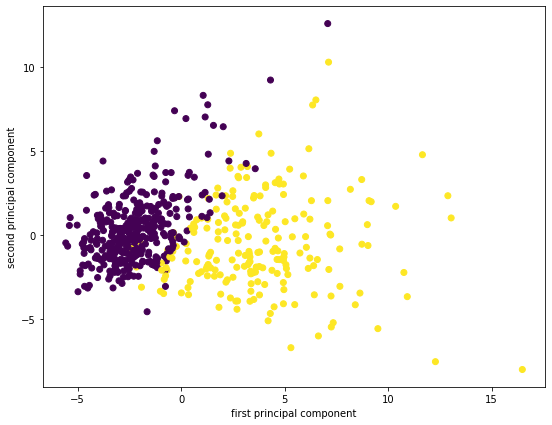

In [46]:
#Plot the two dimensions.
plt.figure(figsize=(9,7))
plt.scatter(pca_transform[:,0],pca_transform[:,1],c=target_data, cmap='viridis')
plt.xlabel('first principal component')
plt.ylabel('second principal component')

In [47]:
#Print the explained variance.
explained_variance_data= pca.explained_variance_ratio_
print(explained_variance_data)

[0.42864701 0.18376792]


In [48]:
#Try the same with 3 principal components.
from sklearn.decomposition import PCA
pca_3 = PCA(n_components=3)

pca_3.fit(scale_data)
pca_3_transform = pca_3.transform(scale_data)

In [49]:
scale_data.shape

(569, 31)

In [50]:
pca_3_transform.shape

(569, 3)

In [51]:
explained_variance= pca_3.explained_variance_ratio_
print(explained_variance)

[0.42864701 0.18376792 0.09146436]


### Check the accuracy for 2nd and 3rd components.

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,target_data,test_size=0.3, random_state=100)

In [61]:
x_train = scale.transform(x_train)
x_test = scale.transform(x_test)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.9590643274853801

In [64]:
x_train = scale.transform(x_train)
x_test = scale.transform(x_test)
x_train = pca_3.transform(x_train)
x_test = pca_3.transform(x_test)

In [65]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.9532163742690059